# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, Dense, Dropout, Activation, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.12.0'


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
## We will import the h5py package which is necessary for loading .h5 files
import h5py

## Loading the data
data = h5py.File('/content/drive/MyDrive/ADSP/SVHN_single_grey1.h5','r')

## Next, we will split the data into train and test datasets
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

## Finally, we will close the file
data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


**Observation:** There are 42,000 images in the training dataset and 18,000 images in the test dataset. Each image is comprised of 32x32 pixels.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

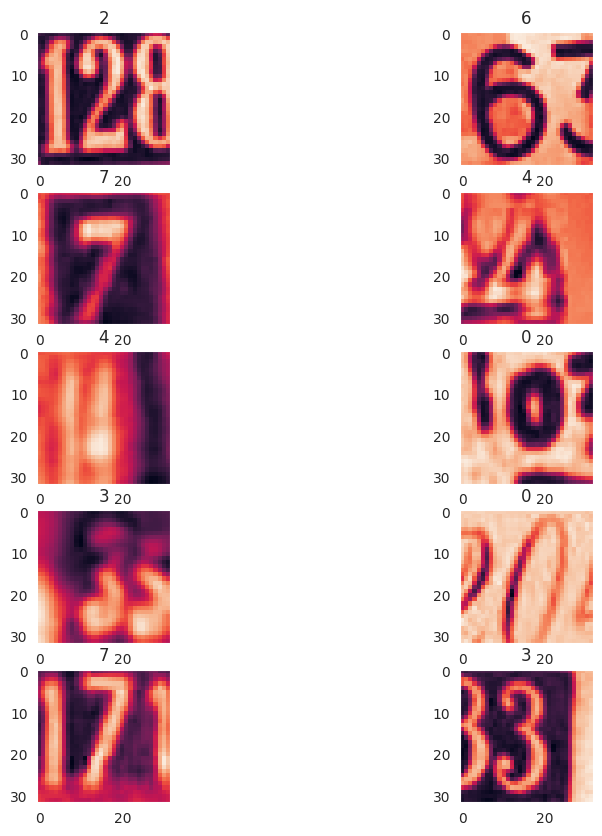

The labels for the first 10 images are: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
## We will plot images in a 5x2 figure
num_rows = 5
num_cols = 2

fig = plt.figure(figsize = (10, 10))

## Creating the 5x2 plot
for i in range(num_rows):
  for j in range(num_cols):
    index = 2*i + j
    ax = fig.add_subplot(num_rows, num_cols, i*num_cols + j + 1)
    ax.imshow(X_train[index, :])
    ax.set_title(y_train[index])

plt.show()

print("The labels for the first 10 images are:", y_train[0:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(X_train[0].shape)
print(X_train[0])

(32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
X_train_normalized = X_train/255
X_test_normalized = X_test/255

Print the shapes of Training and Test data

In [ ]:
print(X_train_normalized.shape)
print(X_test_normalized.shape)

(42000, 32, 32)
(18000, 32, 32)


### **One-hot encode output**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

y_train_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Observation:** Instead of the values of our output in the test and training dataset being integers from 0 to 9, we have changed them into categorical variables instead through one-hot encoding.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
## I will reshape the training and test data to be 1-d arrays of 1024
X_train_normalized = X_train_normalized.reshape(X_train.shape[0], 1024)
X_test_normalized = X_test_normalized.reshape(X_test.shape[0], 1024)

## Call the function to create a new model:
def nn_model_1():

  ## Initialize the model
  nn_model_1 = Sequential()

  ## I will now add the first hidden layer
  nn_model_1.add(Dense(64, input_shape = (1024,), activation = 'relu'))

  ## Adding the second hidden layer
  nn_model_1.add(Dense(32, activation = 'relu'))

  ## Create the output layer
  nn_model_1.add(Dense(10, 'softmax'))

  ## Compiling the model
  nn_model_1.compile(loss = "categorical_crossentropy", metrics = ['accuracy'],
                     optimizer = 'adam')

  return nn_model_1

In [ ]:
## Calling the nn_model_1 function and storing it in a variable
first_model = nn_model_1()

In [ ]:
## Printing the summary of the model
first_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## We will train and validate the model
validation_split = 0.2
batch_size = 128
num_epochs = 20

history_1 = first_model.fit(X_train_normalized, y_train_encoded, epochs = 20,
                batch_size = 128, validation_split = 0.2, shuffle = True, verbose = 1)

Epoch 1/20
263/263 [==============================] - 4s 10ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 9ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 4s 14ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 3s 10ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 8ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 6ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epo

### **Plot the Training and Validation Accuracies and write down your Observations.**

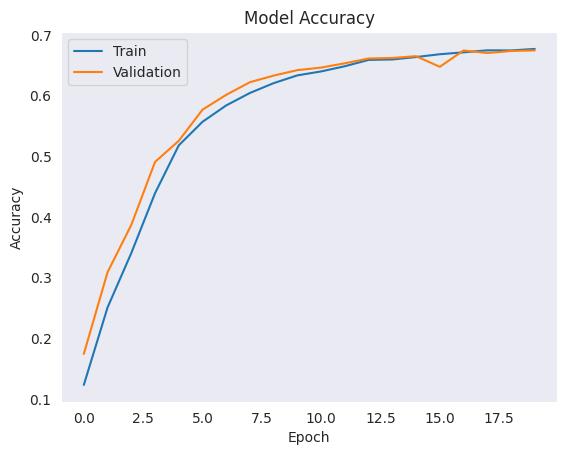

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:** We see that the accuracy of the training set and the validation set are both increasing as the number of epochs increases. Additionally, the accuracy seems to plateau around 0.66 for both the data sets. Finally, the accuracy for both the training and the validation data sets are approximately the same which indicates the model is not overfitting.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
## Clear the backend
from tensorflow.keras import backend

backend.clear_session()

## Fix the seed again
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
  ## Initialize the model
  model = Sequential()

  ## Add the first hidden layer with 256 nodes
  model.add(Dense(256, input_shape = (1024, ), activation = 'relu'))

  ## Add the second hidden layer with ReLU activation function
  model.add(Dense(128, activation = 'relu'))

  ## Add the dropout layer with rate of 0.2
  model.add(Dropout(0.2))

  ## Add the third hidden layer with 64 nodes and ReLU activation
  model.add(Dense(64, activation = 'relu'))

  ## Add the fourth hidden layer with 64 nodes and ReLU activation
  model.add(Dense(64, activation = 'relu'))

  ## Add the fifth hidden layer with 32 nodes and ReLU activation
  model.add(Dense(32, activation = 'relu'))

  ## Add the Batch Normalization Layer
  model.add(BatchNormalization())

  ## Add the output layer
  model.add(Dense(10, 'softmax'))

  ## Finally, we will compile the model
  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),
                metrics = ['accuracy'])

  return model

In [ ]:
second_model = nn_model_2()

In [ ]:
## Summary of the new model
second_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
## Training the model using our traning data and validation data
history_2 = second_model.fit(X_train_normalized, y_train_encoded, epochs = 30,
                             batch_size = 128, validation_split = 0.2,
                             shuffle = True, verbose = 1)

Epoch 1/30
263/263 [==============================] - 5s 13ms/step - loss: 2.3368 - accuracy: 0.1033 - val_loss: 2.3003 - val_accuracy: 0.1115
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 2.2749 - accuracy: 0.1391 - val_loss: 2.2454 - val_accuracy: 0.2026
Epoch 3/30
263/263 [==============================] - 5s 20ms/step - loss: 1.9777 - accuracy: 0.2969 - val_loss: 1.8144 - val_accuracy: 0.4044
Epoch 4/30
263/263 [==============================] - 4s 15ms/step - loss: 1.7011 - accuracy: 0.4128 - val_loss: 1.5368 - val_accuracy: 0.4970
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 1.5312 - accuracy: 0.4858 - val_loss: 1.3850 - val_accuracy: 0.5535
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.3967 - accuracy: 0.5399 - val_loss: 1.2450 - val_accuracy: 0.6074
Epoch 7/30
263/263 [==============================] - 4s 16ms/step - loss: 1.2975 - accuracy: 0.5781 - val_loss: 1.2802 - val_accuracy: 0.5735

### **Plot the Training and Validation Accuracies and write down your Observations.**

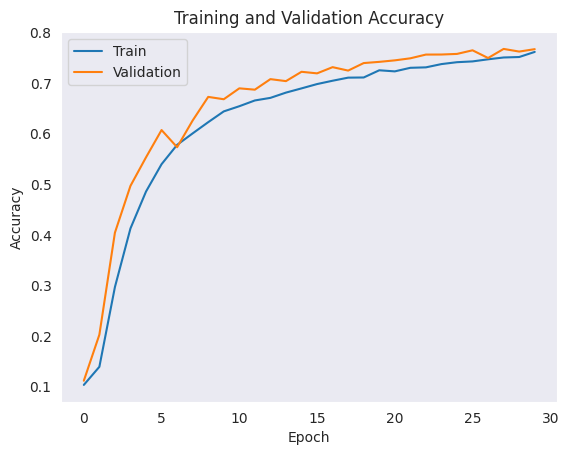

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** Our new model starts out with very low accuracy but is able to quickly increase its accuracy during each epoch to start out. The accuracy rate for the training and validation plateaus at around 75%. Moreover, the accuracy for the validation data set appears to be slightly higher than for the data set aside for training. This is a little odd as normally the validation accuracy tends to be lower. There is not much evidence for overfitting as the model performs equally well on training and validation. We can also see that this model outperforms the first model since accuracy is higher than our simpler model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
Y_pred = second_model.predict(X_test_normalized)
Y_pred = [np.argmax(i) for i in Y_pred]


563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

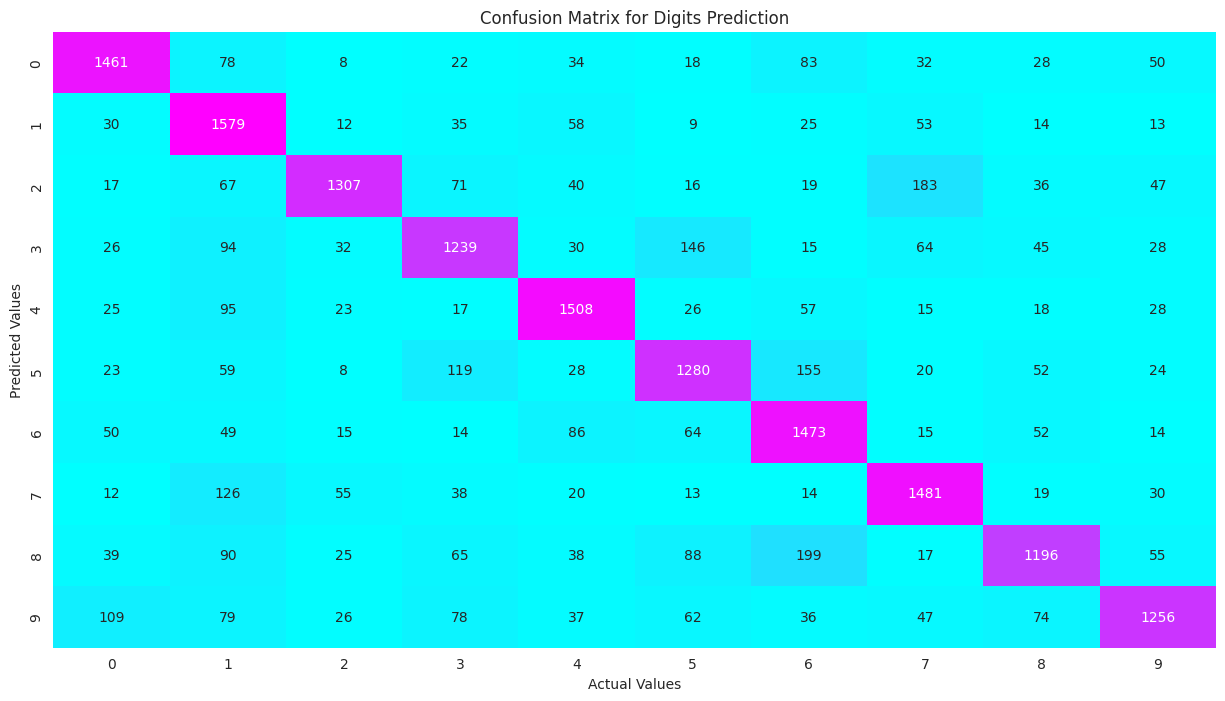

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1814
           1       0.68      0.86      0.76      1828
           2       0.86      0.72      0.79      1803
           3       0.73      0.72      0.73      1719
           4       0.80      0.83      0.82      1812
           5       0.74      0.72      0.73      1768
           6       0.71      0.80      0.75      1832
           7       0.77      0.82      0.79      1808
           8       0.78      0.66      0.71      1812
           9       0.81      0.70      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.76     18000
weighted avg       0.77      0.77      0.77     18000



In [ ]:
sns.set_style("dark")
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix for Digits Prediction")
cm = confusion_matrix([int(x) for x in y_test], Y_pred)

sns.heatmap(cm, annot=True, cmap='cool', fmt='g', cbar=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

print(classification_report(y_test, Y_pred))

**Final Observations:** The model generally does a good job of predicting the correct digits. Our accuracy on the test data was 77% which was in line with how the model performed on the training data. We also see in the confusion matrix that all the diagonal entries are purple which means that the model got most of the predictions of the digits correct. There are a few places where the model misidentifies digits more frequently such as confusing 6 and 8, but in general the model performed pretty well.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

data_new = h5py.File('/content/drive/MyDrive/ADSP/SVHN_single_grey1.h5', 'r')

X_train = data_new['X_train'][:]
y_train = data_new['y_train'][:]
X_test = data_new['X_test'][:]
y_test = data_new['y_test'][:]

data_new.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


**Observation:** There are 42,000 images in the training dataset and 18,000 images in the testing dataset.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
## I will print the shape and the individual pixel values for the first image
## of the training dataset
print(X_train[0].shape)
print(X_train[0])

(32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train/255
X_test= X_test/255

Print New shape of Training and Test

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32, 1)
(18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:** With one-hot encoding the values of y_train and y_test are stored as categorical variables.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
  model = Sequential()

  ## Add the first layer as specified
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", input_shape = (32,32,1)))

  ## Add a Leaky ReLU layer with slope = 0.1
  model.add(LeakyReLU(0.1))

  ## Add second convolutional layer as specified
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))

  ## Add another Leaky ReLU layer
  model.add(LeakyReLU(0.1))

  ## Add the Max Pooling Layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  ## Flatten output from previous layer
  model.add(Flatten())

  ## Add a dense layer with 32 nodes
  model.add(Dense(32))

  model.add(LeakyReLU(0.1))

  ## Output layer
  model.add(Dense(10, activation = 'softmax'))

  ## Finally we will compile the model
  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

  return model

In [ ]:
cnn_model_1 = cnn_model_1()

In [ ]:
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
## Fitting the model using the specified parameters
history_cnn_1 = cnn_model_1.fit(X_train, y_train_encoded, epochs = 20,
                                batch_size = 32, validation_split = 0.2,
                                shuffle = True, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 103s 97ms/step - loss: 1.6537 - accuracy: 0.4732 - val_loss: 0.9616 - val_accuracy: 0.7205
Epoch 2/20
1050/1050 [==============================] - 102s 97ms/step - loss: 0.7953 - accuracy: 0.7761 - val_loss: 0.6998 - val_accuracy: 0.8040
Epoch 3/20
1050/1050 [==============================] - 96s 91ms/step - loss: 0.6538 - accuracy: 0.8110 - val_loss: 0.6592 - val_accuracy: 0.8111
Epoch 4/20
1050/1050 [==============================] - 102s 97ms/step - loss: 0.5884 - accuracy: 0.8312 - val_loss: 0.5920 - val_accuracy: 0.8315
Epoch 5/20
1050/1050 [==============================] - 103s 98ms/step - loss: 0.5497 - accuracy: 0.8427 - val_loss: 0.6016 - val_accuracy: 0.8313
Epoch 6/20
1050/1050 [==============================] - 96s 92ms/step - loss: 0.5147 - accuracy: 0.8528 - val_loss: 0.5775 - val_accuracy: 0.8380
Epoch 7/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.4883 - accuracy: 0.8591 - val_loss: 0.54

### **Plot the Training and Validation Accuracies and Write your observations.**

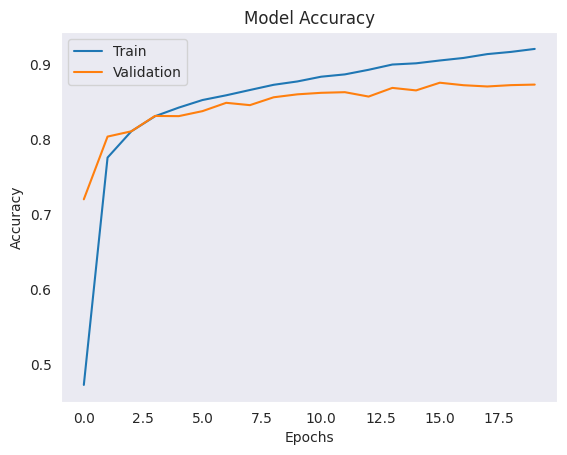

In [ ]:
plt.plot(history_cnn_1.history['accuracy'])
plt.plot(history_cnn_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** Here, we see that the accuracy improves for both the training and validation dataset throughout the epochs. At first the validation accuracy is higher but gets surpassed by the training accuracy relatively quickly. Additionally, the CNN model tends to perform better than the previous two models as the accuracy is around 85% for the validation data set. There is some evidence of overfitting since the accuracy for the training data is higher than the validation data towards the end.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
## We will first clear the backend
from tensorflow.keras import backend
backend.clear_session()

## We will also reset the seed
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
## Write a function to build a model

def cnn_model_2():

  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape = (32,32,1)))

  model.add(LeakyReLU(0.1))

  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))

  model.add(LeakyReLU(0.1))

  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(BatchNormalization())

  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))

  model.add(LeakyReLU(0.1))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same'))

  model.add(LeakyReLU(0.1))

  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(32))

  model.add(LeakyReLU(0.1))

  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

  return model

In [ ]:
cnn_model_2 = cnn_model_2()

In [ ]:
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
## Fitting the model to the specified parameters
history_cnn_2 = cnn_model_2.fit(X_train, y_train_encoded, batch_size = 128,
                                epochs = 30, validation_split = 0.2,
                                shuffle = True, verbose = 1)

Epoch 1/30
263/263 [==============================] - 170s 638ms/step - loss: 1.6567 - accuracy: 0.4150 - val_loss: 2.3973 - val_accuracy: 0.1965
Epoch 2/30
263/263 [==============================] - 159s 605ms/step - loss: 0.8538 - accuracy: 0.7288 - val_loss: 0.8238 - val_accuracy: 0.7639
Epoch 3/30
263/263 [==============================] - 166s 629ms/step - loss: 0.6892 - accuracy: 0.7862 - val_loss: 0.5019 - val_accuracy: 0.8550
Epoch 4/30
263/263 [==============================] - 167s 634ms/step - loss: 0.6060 - accuracy: 0.8100 - val_loss: 0.4852 - val_accuracy: 0.8582
Epoch 5/30
263/263 [==============================] - 153s 581ms/step - loss: 0.5439 - accuracy: 0.8301 - val_loss: 0.4624 - val_accuracy: 0.8682
Epoch 6/30
263/263 [==============================] - 152s 579ms/step - loss: 0.5018 - accuracy: 0.8440 - val_loss: 0.4107 - val_accuracy: 0.8786
Epoch 7/30
263/263 [==============================] - 152s 579ms/step - loss: 0.4757 - accuracy: 0.8556 - val_loss: 0.3858 -

### **Plot the Training and Validation accuracies and write your observations.**

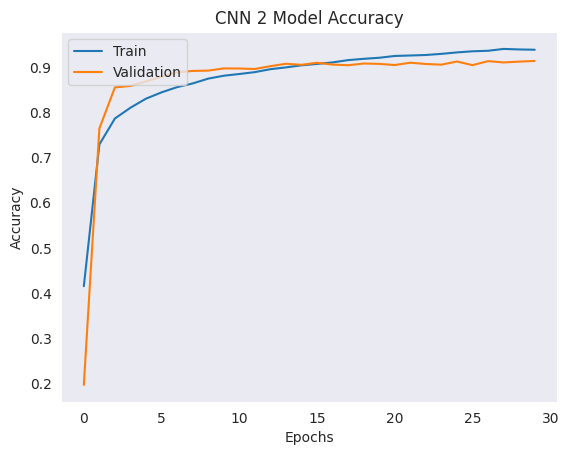

In [ ]:
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])
plt.title('CNN 2 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** The new model does better than the previous CNN at its predictions on the training and validation datasets. This is shown by the higher accuracy. The Dropout layer also helps to reduce overfitting, but towards the end there is still a slight amount of overfitting. Overall, the model is the best model we've used so far.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
test_pred = cnn_model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 22s 39ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

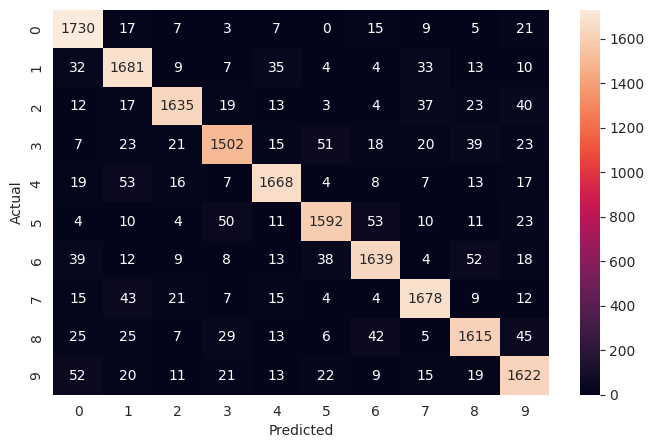

In [ ]:
## We are converting y_test to a single label

y_test_encoded = np.argmax(y_test_encoded, axis = -1)

## Now, we will print the confusion matrix
cm = confusion_matrix(y_test_encoded, test_pred)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

In [ ]:
print(classification_report(y_test_encoded, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.88      0.92      0.90      1828
           2       0.94      0.91      0.92      1803
           3       0.91      0.87      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.92      0.90      0.91      1768
           6       0.91      0.89      0.90      1832
           7       0.92      0.93      0.93      1808
           8       0.90      0.89      0.89      1812
           9       0.89      0.90      0.89      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.88      0.92      0.90      1828
           2       0.94      0.91      0.92      1803
           3       0.91 

**Final Observations:** The CNN is much more accurate than the ANN with an accuracy on the test data of 91%. It is much less likely to make errors in identifying the digits. The elements on the diagonals are lightly shaded, meaning that those are correct identifications, which occur most of the time. Each other sort of misidentification happens much less often.